In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
# Specify the path to your CSV file
standard_data_path= '/content/drive/My Drive/Semester 7/machine learning/lab_1/train.csv'
csv_path_of_test_data='/content/drive/My Drive/Semester 7/machine learning/lab_1/valid.csv'
# Read the CSV file using pandas
standard_data = pd.read_csv(standard_data_path)
test_data=pd.read_csv(csv_path_of_test_data)
# Display the first few rows of the DataFrame
standard_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
standard_data.shape
standard_data.drop(columns=["label_1","label_2","label_3"],axis=1,inplace=True)
test_data.drop(columns=["label_1","label_2","label_3"],axis=1,inplace=True)


In [ ]:
# preprocessing data because there are some NaN values\
columns_with_missing = standard_data.columns[standard_data.isna().any()].tolist()
cleaned_standard_data = standard_data.dropna(subset=columns_with_missing)


In [ ]:
x_train=cleaned_standard_data.iloc[:,:256]
y_train=cleaned_standard_data.iloc[:,256:257]

x_test=test_data.iloc[:,:256]
y_test=test_data.iloc[:,256:257]
print(x_test.shape,y_test.shape)

(750, 256) (750, 1)


In [ ]:
#use knn without preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)
y_pred_before=knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        15
           5       1.00      0.91      0.95        11
           6       0.99      1.00      1.00       532
           7       1.00      0.97      0.98        32
           8       1.00      0.95      0.97        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        11
          12       1.00      0.96      0.98        26
          13       1.00      1.00      1.00        10

    accuracy                           0.99       750
   macro avg       1.00      0.98      0.99       750
weighted avg       0.99      0.99      0.99       750



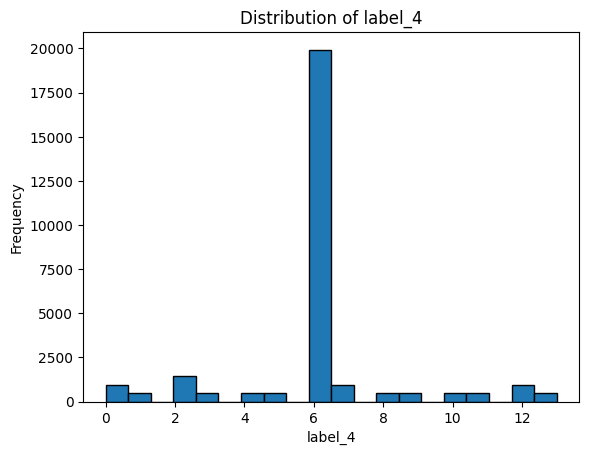

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: label_4, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate label correlations
column_to_visualize = 'label_4'

# Create a histogram
plt.hist(y_train[column_to_visualize], bins=20, edgecolor='k')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_to_visualize}')
plt.show()

frequency_counts = y_train['label_4'].value_counts()
print(frequency_counts)

Resampling because data set is highly imbalanced

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


from imblearn.over_sampling import RandomOverSampler
# # Apply SMOTE to oversample the minority classes
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


over_sampler = RandomOverSampler(sampling_strategy='auto')
x_train_resampled, y_train_resampled = over_sampler.fit_resample(x_train, y_train)


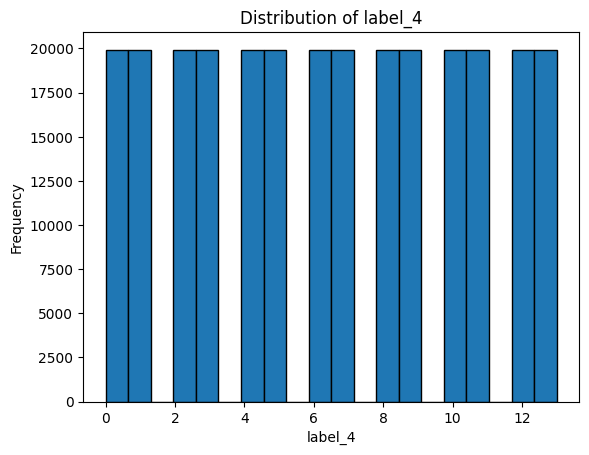

In [ ]:
# after sampling
# Calculate label correlations
column_to_visualize = 'label_4'

# Create a histogram
plt.hist(y_train_resampled[column_to_visualize], bins=20, edgecolor='k')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_to_visualize}')
plt.show()

frequency_counts = y_train['label_4'].value_counts()


scalling

In [ ]:
from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import StandardScaler as ss
scaler = ss()
scaler.fit(x_train_resampled)

x_train_scaled_df= scaler.transform(x_train_resampled)
x_test_scaled_df = scaler.transform(x_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train_scaled_df, y_train_resampled)

# Make predictions on the test set
y_pred = knn.predict(x_test_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        27
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00        15
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00       532
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        11
          12       0.96      1.00      0.98        26
          13       1.00      1.00      1.00        10

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



In [ ]:
correlated_features = set()
correlation_matrix =x_train.corr()
x_train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,-0.105048,-0.057641,-0.052484,-0.132177,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,0.011812,0.001762,0.162572,0.052741,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039956,-0.030585,-0.196724,0.127026,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.110797,0.001961,-0.246270,-0.227987,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,-0.158222,-0.093759,-0.205398,0.169982,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.293291,0.145376,-0.032455,-0.263488,0.046793,0.083610,-0.105217,0.111556,0.021658,-0.135744,...,-0.291179,-0.058649,-0.050666,0.174844,-0.200496,1.000000,0.207554,-0.132150,0.173118,0.401299
feature_253,-0.130838,0.227251,-0.095846,0.018143,0.000250,0.104036,0.169003,0.177270,-0.219734,-0.211072,...,-0.289260,-0.190506,0.017967,0.093282,0.156962,0.207554,1.000000,0.169700,0.031999,-0.146592
feature_254,0.213589,0.142215,-0.044789,0.339311,0.366209,0.244566,-0.191455,0.005285,0.095907,0.091993,...,-0.352404,-0.138879,-0.178728,-0.259972,0.314718,-0.132150,0.169700,1.000000,-0.007740,-0.262347
feature_255,-0.029109,0.186345,-0.191170,-0.043473,0.250435,0.153653,-0.215283,0.025924,-0.093347,-0.103102,...,-0.014113,0.042190,0.107745,0.147976,-0.302310,0.173118,0.031999,-0.007740,1.000000,0.179979


In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

181

In [ ]:
print(correlated_features)

{'feature_173', 'feature_209', 'feature_119', 'feature_73', 'feature_221', 'feature_206', 'feature_162', 'feature_250', 'feature_98', 'feature_58', 'feature_183', 'feature_196', 'feature_213', 'feature_223', 'feature_248', 'feature_238', 'feature_134', 'feature_161', 'feature_241', 'feature_247', 'feature_61', 'feature_65', 'feature_166', 'feature_157', 'feature_194', 'feature_216', 'feature_180', 'feature_69', 'feature_252', 'feature_49', 'feature_210', 'feature_251', 'feature_60', 'feature_129', 'feature_232', 'feature_189', 'feature_155', 'feature_72', 'feature_95', 'feature_205', 'feature_78', 'feature_239', 'feature_143', 'feature_97', 'feature_212', 'feature_57', 'feature_71', 'feature_38', 'feature_222', 'feature_201', 'feature_103', 'feature_220', 'feature_124', 'feature_126', 'feature_84', 'feature_70', 'feature_192', 'feature_184', 'feature_186', 'feature_172', 'feature_112', 'feature_151', 'feature_145', 'feature_93', 'feature_170', 'feature_113', 'feature_214', 'feature_236

In [ ]:
# x_train_scaled_df.drop(columns=correlated_features, axis=1, inplace=True)
# x_test_scaled_df.drop(columns=correlated_features, axis=1, inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score

# Split data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(trai_features, y_imputed_label_1, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train_scaled_df, y_train_resampled)

# Make predictions on the test set
y_pred = knn.predict(x_test_scaled_df)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        27
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00        15
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00       532
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        11
          12       0.96      1.00      0.98        26
          13       1.00      1.00      1.00        10

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



In [ ]:
from sklearn.decomposition import PCA

pca=PCA(.98, svd_solver='full')
pca=pca.fit(x_train_scaled_df)
x_train_pca=pca.transform(x_train_scaled_df)
x_test_pca=pca.transform(x_test_scaled_df)
print(x_test_pca.shape)

(750, 88)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(trai_features, y_imputed_label_1, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train_pca, y_train_resampled)

# Make predictions on the test set
y_pred = knn.predict(x_test_pca)
y_pred_after=knn.predict(x_test_pca)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        27
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00        15
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00       532
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        11
          12       0.96      1.00      0.98        26
          13       1.00      1.00      1.00        10

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



In [ ]:
pca_pca_columns = [f'New_feature_{i+1}' for i in range(x_train_pca.shape[1])]
df_final_Label1 = pd.DataFrame(x_test_pca, columns=pca_pca_columns)
df_final_Label1.insert(0, 'Label_1_predictions_before', y_pred_before)
df_final_Label1.insert(1, 'Label_1_predictions_after',y_pred_after)
df_final_Label1.insert(2,'No of new features', [pca.n_components_ for i in range(len(y_pred_before))])
df_final_Label1.to_csv('190088H_Label_4.csv')